# Naive Bayes

Naive Bayes is a powerful machine-learning algorithmn which is used for machine-learning and probabilistic modelling. It utilises the Baye's Theorem and is most useful for textual analysis, for any categorical identification, may it be in the areas of education, security, health and social sector.  

Naive Bayes is built on the Bayes' theorem, which is a conditional probability model. Wherein, it allows the user to calculate the probabilities of a particular class or a category given a set of features or independant variables. As the features are assumed to be independant, the probability is calculated on basis of that assumption.

Naive Bayes' primary goal is to classify data into specified classes or categories based on observed attributes. This is accomplished by taking into account both the prior probability of each class (as informed by historical data or domain knowledge) and the likelihood of witnessing the provided traits under each class. This data is used to compute the conditional probability of each class and determine which class is more likely given the given data.

There are various types of Naive Bayes: 

1. The Gaussian Naive Bayes algorithm is appropriate for continuous or real-valued data, such as medical measures. 
2. Multinomial Naive Bayes excels at text classification, which makes it useful for tasks such as spam detection and sentiment analysis when features represent word counts or phrase frequencies. 
3. Bernoulli Naive Bayes is an excellent choice for working with binary data, and it is frequently
   
Due to Naive Bayes' computational efficiency and the ability to carry it on with simplicity, the approach is appealing to many machine learning practitioners. You can acquire accurate and relevant classification results by picking the proper Naive Bayes variant and applying it to your specific dataset. Naive Bayes is especially well-suited for scenarios requiring speed, simplicity, and a probabilistic approach. Because of its probabilistic character and foundation in Bayes' theorem, it can make educated decisions and is a vital addition to the machine learning toolset.

In [29]:
import  pandas  as  pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score


In [4]:
def accuracy(y,ypred):
    #compute accuracy
    print("Accuracy:", accuracy_score(y, ypred)*100)
    
def precision(y,ypred):
    #compute precision
    print("Precision Score:", precision_score(y, ypred, average="micro")*100)
    
def recall(y,ypred):
    #compute recall
    print("Recall Score:", recall_score(y, ypred, average="micro")*100)


def f1(y,ypred):
    #compute f1
    print("F1 Score:", f1_score(y, ypred, average="micro")*100)

## Naive Bayes for Quantitative data

As my data consists of data for 5 BRICS nations separately and also contains a dataframe which is a culmination of my existing datasets. As discussed in the cleaning section, the stacked_df has self generated labels section that I had created to ensure it is usable for Naive Bayes. Whilst it is not actually recommended to create self-generated labels for the datasets, especially for the economic data as it works on the progression of time and things are extremely volatile. However, for utilising Naive Bayes I had created it. So my utilisation of Naive Bayes taking the entire dataset into consideration is so I used the Gaussian Naive Bayes data as it is useful for the real-life data. 

In [5]:
india=pd.read_csv('../data/india.csv')
russia=pd.read_csv('../data/russia.csv')
china=pd.read_csv('../data/china.csv')
brazil=pd.read_csv('../data/brazil.csv')
southafrica=pd.read_csv('../data/southafrica.csv')
stacked_df = pd.concat([india, russia, china, brazil, southafrica])

In [6]:
stacked_df.isna().sum()
stacked_df = stacked_df.dropna()
stacked_df.drop(columns='year')


,adj_NNI_g,adj_NNI_c,adj_savings_fix_cap_GNI,adj_savings_edu_GNI,adj_NNS_GNI,curr_acc_bal,ex_imp_gdp,ex_imp_growth,ex_debt_shocks,final_consump_exp_gdp,...,cpi,inflation,real_interest_rate,lending_interest_rate,life_exp_birth,expense_gdp,interest_payments,military expenditure,year.1,labels
0,11.978544,2.476830e+11,8.055168,2.600000,6.418183,-0.958069,6.139551,5.237330,11.096107,87.498021,...,9.737409,11.346073,4.476508,16.500000,53.611000,11.702478,13.780033,3.133781,1979.0,High Growth
1,-2.572689,2.413109e+11,8.393346,2.600000,7.373027,-1.394549,5.936027,-0.816934,11.615484,85.768606,...,11.014232,13.112547,5.118237,16.500000,54.175000,11.376034,14.073244,3.186248,1980.0,High Growth
2,1.626264,2.452352e+11,8.819348,3.051058,7.043158,-1.257273,5.983300,6.020508,13.467614,85.319441,...,11.883336,7.890743,7.774707,16.500000,54.732000,11.959873,15.563031,3.345118,1981.0,Moderate Growth
3,11.562099,2.735896e+11,8.419293,3.153437,7.024774,-0.887438,5.837629,-0.914918,14.101651,85.635851,...,13.293660,11.868081,7.320987,16.500000,55.281000,12.077793,17.460567,3.323069,1982.0,Very High Growth
4,1.851968,2.786564e+11,8.784357,2.700000,7.097912,-1.089317,6.283401,7.297852,15.530868,84.960526,...,14.399548,8.318907,7.947100,16.500000,55.816000,13.142960,19.011381,3.416876,1983.0,Moderate Growth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,1.084757,2.973289e+11,-0.146507,14.267286,5.514553,13.954344,-0.328763,-3.008700,27.562640,2.741158,...,1.981519,92.692307,54.627712,152.646240,4.517165,6.108760,65.674000,0.897196,2018.0,Low Growth
46,0.621565,2.991770e+11,-0.673157,14.415053,5.820015,13.810482,-0.595410,-2.625377,27.297471,-3.445217,...,1.108507,80.819685,54.054766,158.935640,4.120246,5.243711,66.175000,0.884245,2019.0,Low Growth
47,-5.191452,2.836454e+11,-6.344067,15.342080,5.820015,14.898851,-0.451413,1.984891,27.600303,-11.862908,...,-4.398186,67.402320,50.800982,164.037531,3.210036,1.907151,65.252000,0.957517,2020.0,Low Growth
48,2.944993,1.726618e+11,1.019058,14.617378,5.340494,19.599354,4.980877,3.699256,31.193814,9.986850,...,4.088044,63.010063,56.217980,171.602404,4.611672,0.774484,62.341000,0.809813,2021.0,Very High Growth


I dropped the NA as it wasn't required for this and not for the further data analysis tasks.

### Train-Test Split

In [7]:
Y = stacked_df['labels']
X =  stacked_df.drop(['labels'],axis =1)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
x_train_valid, x_valid_test, y_train_valid, y_valid_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))
print('Valid Train data    :'+str(x_train_valid.shape))
print('Valid Test data     :'+str(x_valid_test.shape))
print('Valid Train Output  :'+str(y_train_valid.shape))
print('Valid Test Output   :'+str(y_valid_test.shape))

Train data    :(88, 35)
Test data     :(23, 35)
Train Output  :(88,)
Test Output   :(23,)
Valid Train data    :(11, 35)
Valid Test data     :(12, 35)
Valid Train Output  :(11,)
Valid Test Output   :(12,)


### Feature-Selection Method

The feature-selection method plays an important role in understanding which features to select as most of the times high multicollinearity can affect the dataset. According to this, the features mentioned below, the top 10 and the bottom 10 are the features that are highly correlated with each other and can be removed.

In [9]:
corr=stacked_df.corr
corr

<bound method DataFrame.corr of     year  adj_NNI_g     adj_NNI_c  adj_savings_fix_cap_GNI  \
0   1979  11.978544  2.476830e+11                 8.055168   
1   1980  -2.572689  2.413109e+11                 8.393346   
2   1981   1.626264  2.452352e+11                 8.819348   
3   1982  11.562099  2.735896e+11                 8.419293   
4   1983   1.851968  2.786564e+11                 8.784357   
..   ...        ...           ...                      ...   
45  2018   1.084757  2.973289e+11                -0.146507   
46  2019   0.621565  2.991770e+11                -0.673157   
47  2020  -5.191452  2.836454e+11                -6.344067   
48  2021   2.944993  1.726618e+11                 1.019058   
49  2022   2.944993  1.726618e+11                 1.019058   

    adj_savings_edu_GNI  adj_NNS_GNI  curr_acc_bal  ex_imp_gdp  ex_imp_growth  \
0              2.600000     6.418183     -0.958069    6.139551       5.237330   
1              2.600000     7.373027     -1.394549    5.93602

In [10]:
# using pearson
corr = stacked_df.corr(numeric_only=True)
corr_matrix = corr.stack()
positive_corr = corr_matrix[corr_matrix > 0]
positive_top = positive_corr.sort_values(ascending=True)
positive_top = positive_top.head(10)
print(positive_top)

military expenditure        gni_growth                    0.003564
gni_growth                  military expenditure          0.003564
adj_savings_fix_cap_GNI     military expenditure          0.010298
military expenditure        adj_savings_fix_cap_GNI       0.010298
                            gdp_growth                    0.019195
gdp_growth                  military expenditure          0.019195
ex_debt_shocks              adj_NNI_g                     0.029714
adj_NNI_g                   ex_debt_shocks                0.029714
gener_govt_fin_consump_exp  military expenditure          0.034514
military expenditure        gener_govt_fin_consump_exp    0.034514
dtype: float64


In [11]:
corr = stacked_df.corr(numeric_only=True)
corr_matrix = corr.stack()
negative_corr = corr_matrix[corr_matrix < 0]
negative_bottom = negative_corr.sort_values(ascending=True)
negative_bottom = negative_bottom.head(10)
print(negative_bottom)

final_consump_exp_gdp  fdi_net_inflows         -0.979383
fdi_net_inflows        final_consump_exp_gdp   -0.979383
final_consump_exp_gdp  interest_payments       -0.945499
interest_payments      final_consump_exp_gdp   -0.945499
real_interest_rate     final_consump_exp_gdp   -0.939753
final_consump_exp_gdp  real_interest_rate      -0.939753
                       services_growth         -0.919109
services_growth        final_consump_exp_gdp   -0.919109
final_consump_exp_gdp  curr_acc_bal            -0.892012
curr_acc_bal           final_consump_exp_gdp   -0.892012
dtype: float64


In [12]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [13]:
pred_valid = naive_bayes.predict(x_train_valid)

In [14]:
# Predicting the train data and test data
pred_train = naive_bayes.predict(X_train)
pred_test = naive_bayes.predict(X_test)

In [15]:
# Training data

accuracy(y_train, pred_train)
precision(y_train, pred_train)
recall(y_train, pred_train)
f1(y_train, pred_train)
    

Accuracy: 60.22727272727273
Precision Score: 60.22727272727273
Recall Score: 60.22727272727273
F1 Score: 60.22727272727273


We see that the accuracy, precision, recall and f1 score are all 60%

In [16]:
# Testing Data

accuracy(y_test, pred_test)
precision(y_test, pred_test)
recall(y_test, pred_test)
f1(y_test, pred_test)

Accuracy: 56.52173913043478
Precision Score: 56.52173913043478
Recall Score: 56.52173913043478
F1 Score: 56.52173913043478


We see that the accuracy, precision, recall and f1 score are all 54%. This means the testing data performs lesser than training, it means the model may be underfitted. And the Validation dataset performs a bit lesser which means there is high bias and low variance.

In [17]:
# Validation 
accuracy(y_train_valid, pred_valid)
precision(y_train_valid, pred_valid)
recall(y_train_valid, pred_valid)
f1(y_train_valid, pred_valid)

Accuracy: 54.54545454545454
Precision Score: 54.54545454545454
Recall Score: 54.54545454545454
F1 Score: 54.54545454545454


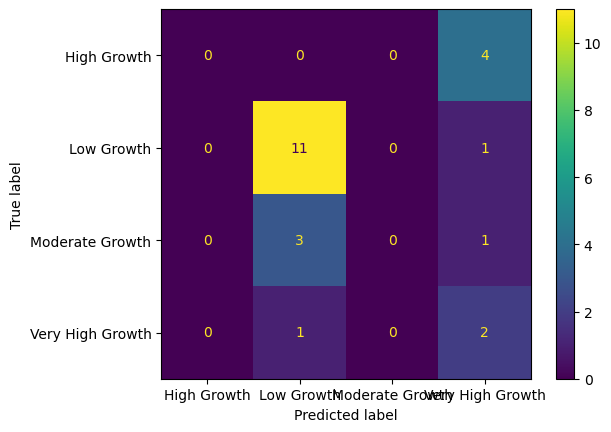

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)

According to the confusion matrix, we see that the High Growth not been predicted properly, followed by Moderate Growth. This is also a problem that comes when we self-emerge the dataset.

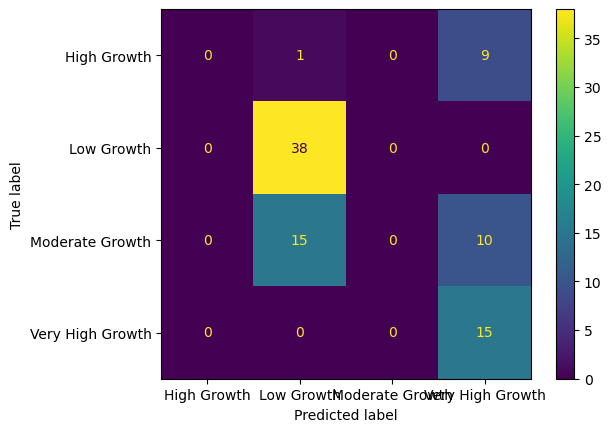

In [19]:
ConfusionMatrixDisplay.from_predictions(y_train, pred_train)

In the training data, Moderate Growth have been misslabelled and even the Very high Growth categories.

## Naive Bayes for Textual Data data

Understanding the textual data is also just as important since the textual data gives us a lot of information about whatever is happening in terms of the public opinion which is extremely important from the point of view of the data. Understanding and carefully making sure to categorise this is important as well. For this data, we have used the textual data that has been retrieved from the Reddit PRAW wrapper and has been labelled using the Sentiment Intensity Analyser. 

In [20]:
finaldf=pd.read_csv('../data/sentiment.csv')

In [21]:
finaldf.head(10)

,Unnamed: 0,cleaned_tweets,label
0,0,burn flag,0
1,1,plan kill petro dollar run manipulated western...,-1
2,2,difficult know whats going come summit next we...,-1
3,3,lot unpack brics would bring table officially ...,1
4,4,nice feel way thats brics supped make feel lik...,1
5,5,seems like well ahead schedule already 50 perc...,1
6,6,yeah precisely fully explained today family me...,1
7,7,watched lecture school predicted global south ...,1
8,8,think hope happens sooner rather later live eu...,1
9,9,supposed happen week hold boys,0


In [26]:

finaldf = finaldf.loc[:, ['cleaned_tweets', 'label']] 
finaldf.head(10)

,cleaned_tweets,label
0,burn flag,0
1,plan kill petro dollar run manipulated western...,-1
2,difficult know whats going come summit next we...,-1
3,lot unpack brics would bring table officially ...,1
4,nice feel way thats brics supped make feel lik...,1
5,seems like well ahead schedule already 50 perc...,1
6,yeah precisely fully explained today family me...,1
7,watched lecture school predicted global south ...,1
8,think hope happens sooner rather later live eu...,1
9,supposed happen week hold boys,0


In [27]:

# Assuming you have a DataFrame with 'text' and 'label' columns
X = finaldf['cleaned_tweets']  # Text data
Y = finaldf['label']  # Target labels

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)
x_train_valid, x_valid_test, y_train_valid, y_valid_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)
print('Train data    :'+str(X_train.shape))
print('Test data     :'+str(X_test.shape))
print('Train Output  :'+str(y_train.shape))
print('Test Output   :'+str(y_test.shape))
print('Valid Train data    :'+str(x_train_valid.shape))
print('Valid Test data     :'+str(x_valid_test.shape))
print('Valid Train Output  :'+str(y_train_valid.shape))
print('Valid Test Output   :'+str(y_valid_test.shape))

Train data    :(96,)
Test data     :(24,)
Train Output  :(96,)
Test Output   :(24,)
Valid Train data    :(12,)
Valid Test data     :(12,)
Valid Train Output  :(12,)
Valid Test Output   :(12,)


I divided the data into training, testing and validation. Training accounts for 80% of the data, testing accounts for 20% of the data and validation accounts for 50% of the data.

#### Feature extraction using TF-IDF

Term Frequency-Inverse Document Frequency, or TF-IDF, is a critical text analysis technique used to determine the significance of words in texts. It allocates numerical values to words based on their frequency in a document and rarity in a set of documents. TF-IDF aids in ranking and finding relevant texts, extracting key information, and reducing the dimensionality of text data by assigning higher scores to terms that are both frequent in the document and unique to it. Since my data contains information which can have strong sentiments associated to it, I utilised it.

In [30]:

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
x_train_valid_tfidf= tfidf_vectorizer.transform(x_train_valid)

In [31]:

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

# training data
y_pred_train = mnb.predict(X_train_tfidf)

# testing data
y_pred_test = mnb.predict(X_test_tfidf)

#validation
y_pred_val = mnb.predict(x_train_valid_tfidf)

I utilised Multinomial Naive Bayes as it helps in textual classification concerning sentiment analysis. The values for accuracy, precision, recall and F1 have been calculated. It is seen that Training and Testing perform equally well, meaning there is no overfitting or underfitting seen.

In [32]:
accuracy_train = accuracy_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train, average="micro")
recall_train = recall_score(y_train, y_pred_train, average="micro")
f1_train = f1_score(y_train, y_pred_train, average="micro")

print("Training Set Metrics:")
print("Accuracy:", accuracy_train)
print("Precision Score:", precision_train)
print("Recall Score:", recall_train)
print("F1 Score:", f1_train)

Training Set Metrics:
Accuracy: 0.6354166666666666
Precision Score: 0.6354166666666666
Recall Score: 0.6354166666666666
F1 Score: 0.6354166666666666


In [33]:
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average="micro")
recall_test = recall_score(y_test, y_pred_test, average="micro")
f1_test = f1_score(y_test, y_pred_test, average="micro")

print("Testing Set Metrics:")
print("Accuracy:", accuracy_train*100)
print("Precision Score:", precision_train*100)
print("Recall Score:", recall_train*100)
print("F1 Score:", f1_train*100)

Testing Set Metrics:
Accuracy: 63.541666666666664
Precision Score: 63.541666666666664
Recall Score: 63.541666666666664
F1 Score: 63.541666666666664


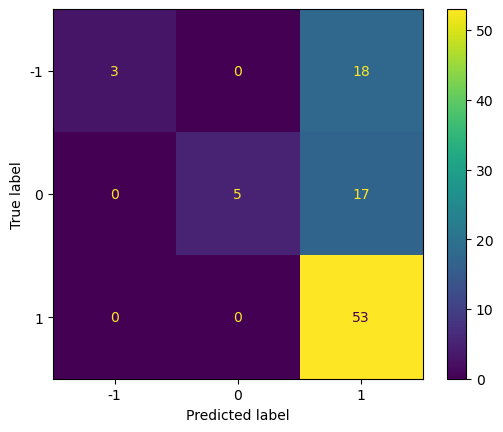

In [35]:
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)


For training dataset, if you see, the values have been labelled correctly but the 17 labels with 0 indicating no opinion has been predicted as 1 which means a positive sentiment. And similarly the negative sentiment has been predicting as positive sentiment.

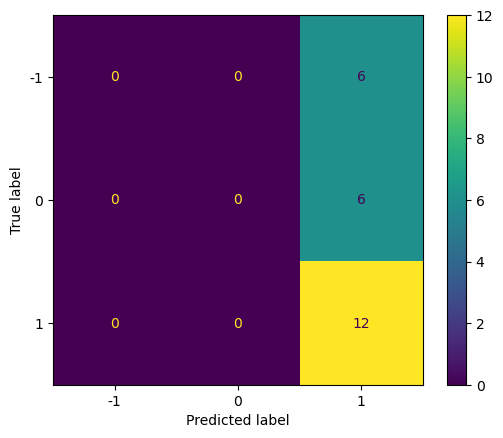

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)

For testing dataset, if you see, the values have been labelled correctly but the 6 labels with 0 indicating no opinion has been predicted as 1 which means a positive sentiment. 6 of neutral sentiments with 0 have also been predicted as 1. 

Both textual and quantitative naive have shown its efficiency in predicting categorical class, however, this also provides a que into further development and analysis of this project to work on this more and utilise better feature selection and feature engineering methods to increase the overall metrics.